In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.src.legacy.preprocessing.image import ImageDataGenerator


In [113]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [114]:
X_train.shape

(50000, 32, 32, 3)

In [115]:
X_test.shape

(10000, 32, 32, 3)

In [116]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

[9]


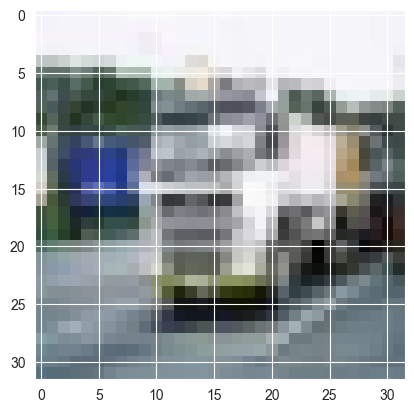

In [117]:
i = 1000
plt.imshow(X_train[i])
print(y_train[i])

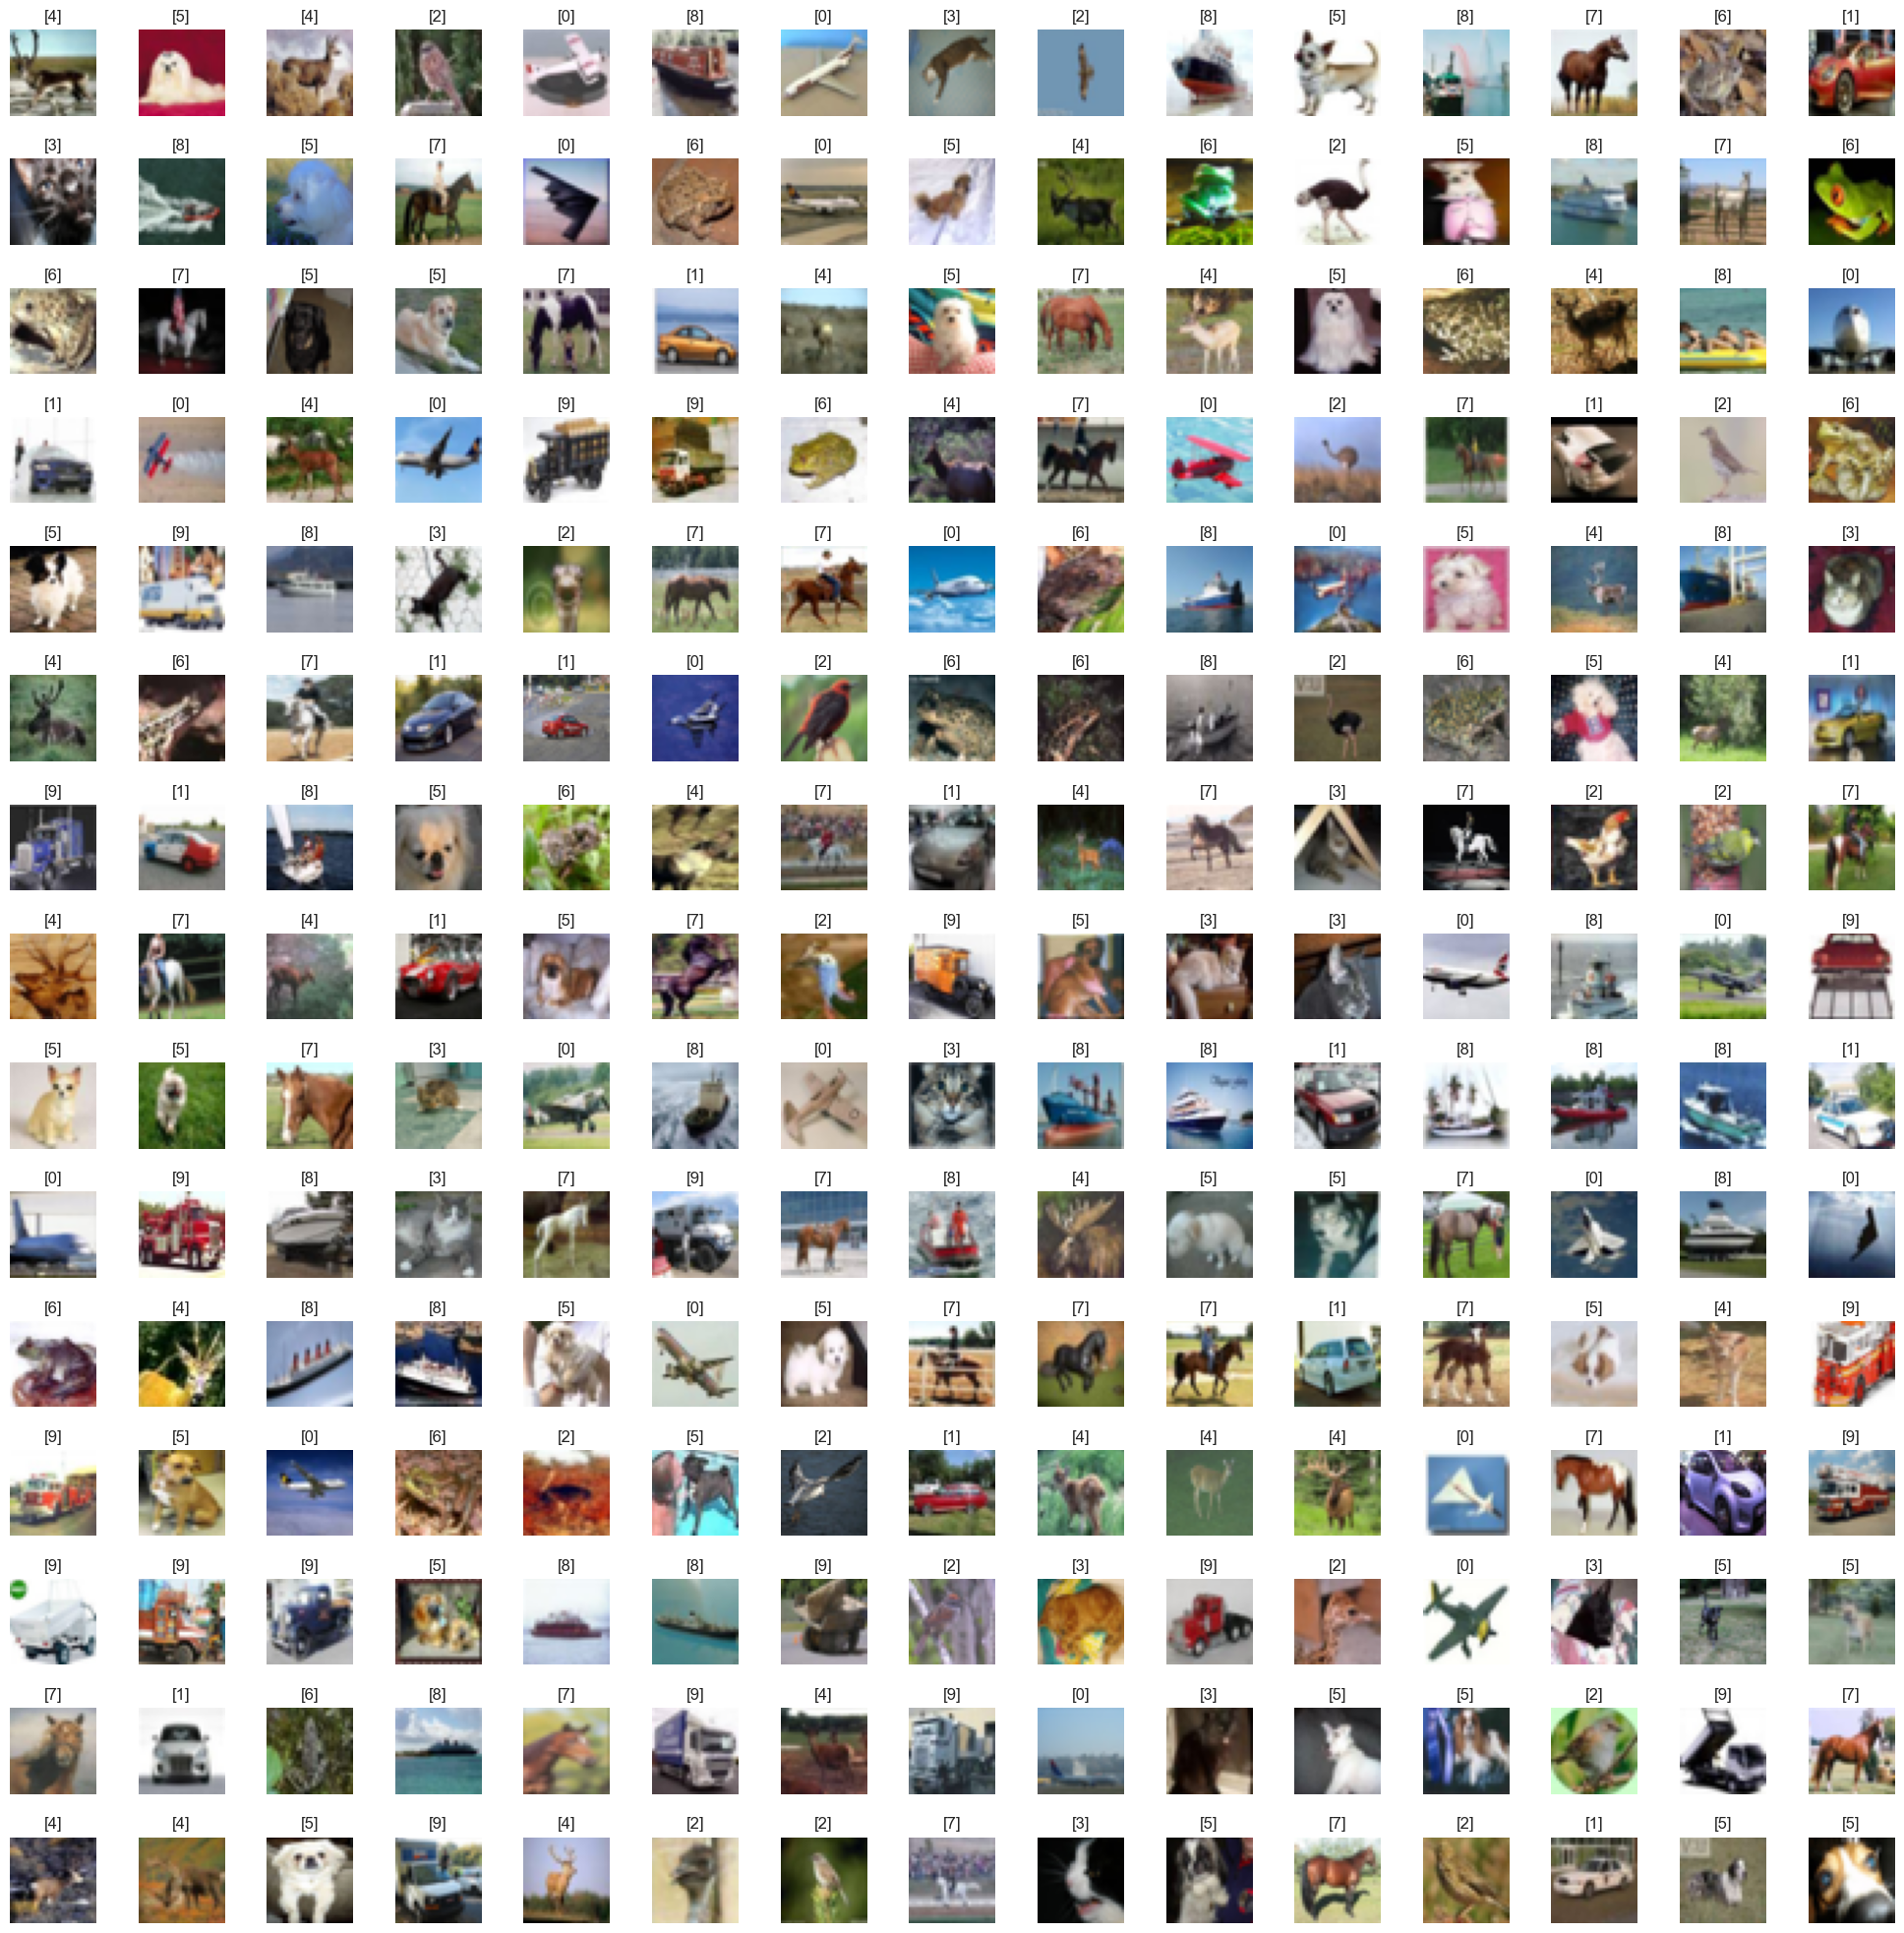

In [118]:
W_grid = 15
L_grid = 15

fig,axes = plt.subplots(W_grid, L_grid, figsize=(25,25))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0,L_grid*W_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')


plt.subplots_adjust(hspace=0.5)


In [119]:
for i in np.arange(0,L_grid*W_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])



In [120]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [121]:
cat = 10

In [122]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [123]:
import keras
y_train = keras.utils.to_categorical(y_train,10)

In [124]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [125]:
y_test = keras.utils.to_categorical(y_test,10)


In [126]:
X_train  = X_train/255
X_test  = X_test/255

In [127]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [128]:
Input_shape = X_train.shape[1:]

In [129]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [130]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu',input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

D:\Programowanie\deep_learning\.venv1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [131]:
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=1024,activation = 'relu'))
cnn_model.add(Dense(units=1024,activation = 'relu'))
cnn_model.add(Dense(units=10,activation = 'softmax'))


In [132]:
from tensorflow.keras import optimizers
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=0.001),  # not lr=...
    metrics=['accuracy']
)

In [133]:
history = cnn_model.fit(X_train,y_train,batch_size=32,epochs=2,shuffle=True)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.2936 - loss: 1.9115
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.5839 - loss: 1.1872


In [134]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)


In [135]:
evaluation = cnn_model.evaluate(X_test,y_test,batch_size=32)
print('Test accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6046 - loss: 1.2151
Test accuracy: 0.5975000262260437


In [136]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6046 - loss: 1.2151
Test accuracy: 0.5975000262260437


In [137]:
predictions = cnn_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print('Predicted classes:', predicted_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Predicted classes: [6 8 8 ... 5 4 7]


In [138]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [139]:
y_test = y_test.argmax(1)

In [140]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

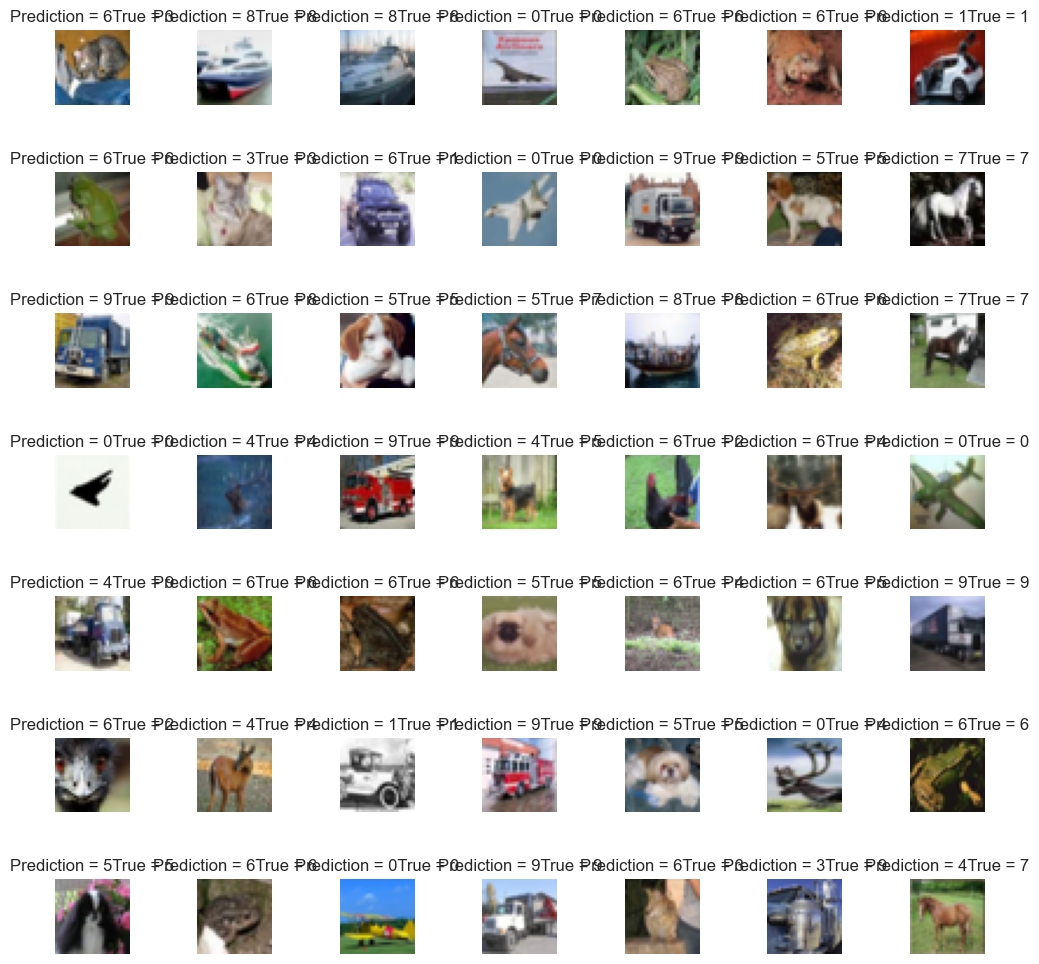

In [141]:
L=7
W=7
fig,agex = plt.subplots(L,W,figsize=(12,12))
axes = agex.ravel()

for i in np.arange(0,W*L):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f'Prediction = {predicted_classes[i]}'
                      f'True = {y_test[i]}')

    axes[i].axis('off')
plt.subplots_adjust(hspace=0.9,wspace=0.9)

In [142]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,predicted_classes)
cm

array([[750,  10,  61,  34,  19,  10,  39,   4,  64,   9],
       [ 24, 745,   5,  22,  12,   4, 113,   1,  46,  28],
       [ 78,   1, 411,  37,  65,  80, 317,   9,   2,   0],
       [ 17,   0,  41, 356,  45, 179, 349,   7,   6,   0],
       [ 21,   1,  51,  48, 416,  17, 422,  17,   7,   0],
       [ 10,   1,  40, 158,  49, 546, 181,  13,   2,   0],
       [  1,   0,  15,  17,   4,   8, 954,   0,   1,   0],
       [ 15,   1,  40,  47, 139, 106, 120, 529,   1,   2],
       [ 82,  15,  26,  48,  11,   7,  52,   2, 754,   3],
       [ 61, 100,  11,  69,  19,  13, 167,   9,  37, 514]])

<Axes: >

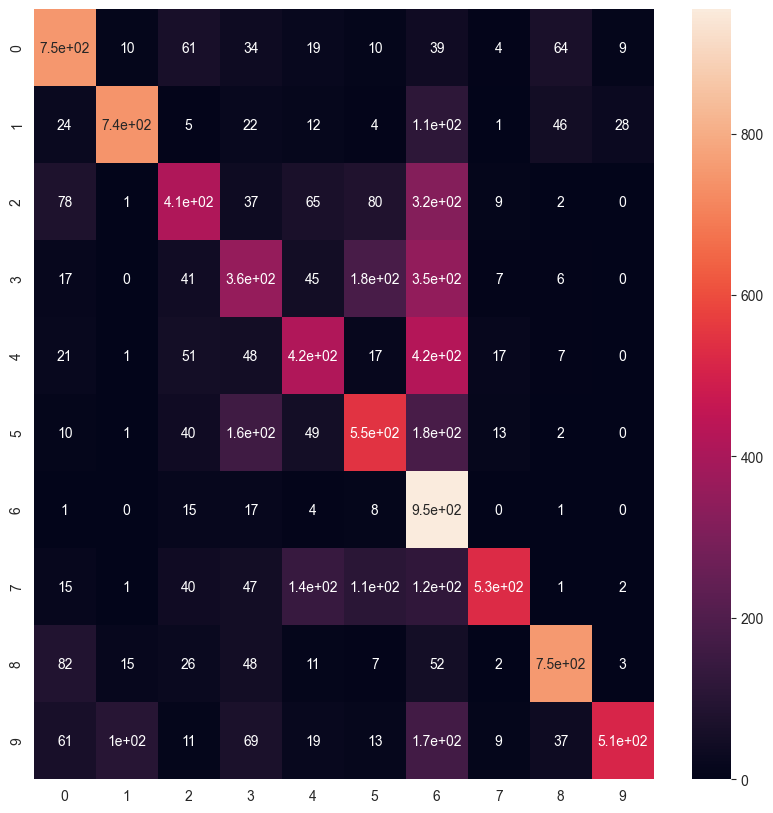

In [143]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot=True)

In [144]:
import os
from keras.saving import save_model

directory = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'keras_cifar10_img_classifier.keras')
save_model(cnn_model, model_path)


In [53]:
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [54]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [55]:
x_train.shape

(50000, 32, 32, 3)

In [56]:
n = 8
x_train_sample = x_train[:n]

In [48]:
x_train.shape

(8, 32, 32, 3)

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dataget_train = ImageDataGenerator(rotation_range=90)
dataget_train = ImageDataGenerator(vertical_flip = True)
dataget_train.fit(x_train_sample)

In [62]:
print(x_train_sample.min(), x_train_sample.max())


0.0 255.0


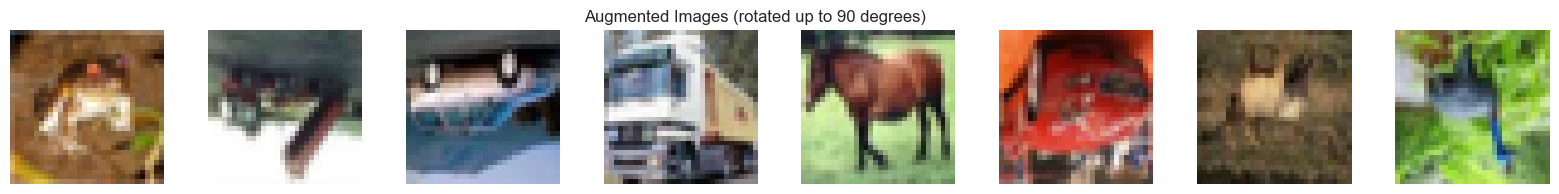

In [65]:
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 2))

for x_batch in dataget_train.flow(x_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i + 1)
        img = Image.fromarray((x_batch[i]).astype('uint8'))
        ax.imshow(img)
        ax.axis('off')

    fig.suptitle('Augmented Images (rotated up to 90 degrees)')
    plt.show()
    break

In [145]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
)

In [147]:
datagen.fit(X_train)

In [148]:
cnn_model.fit(datagen.flow(X_train,y_train,batch_size=32),epochs=4)

Epoch 1/4


D:\Programowanie\deep_learning\.venv1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 78ms/step - accuracy: 0.3859 - loss: 1.7347
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.4583 - loss: 1.5364
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.4745 - loss: 1.4878
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.4864 - loss: 1.4646


# Very Poor acc
